In [ ]:
from impresso import connect

impresso = connect()

# Search

Find content items in Impresso using a variety of different filters.

## Term

Find all items containing "impresso" keyword.

In [4]:
impresso.search.find(term="monthy python")

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
IMP-1990-12-07-a-i0433,in_cpy,ar,print,s s w xi,"[{'uid': 'tm-fr-all-v2.0_tp44_fr', 'relevance'...",1281,1,fr,False,1990-12-07T00:00:00+00:00,...,[42],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDL-1983-09-24-a-i0020,in_cpy,ar,print,Sur les écrans lausannois,"[{'uid': 'tm-fr-all-v2.0_tp73_fr', 'relevance'...",111,1,fr,False,1983-09-24T00:00:00+00:00,...,[2],[],"[{'uid': '2-54-Colisée', 'count': 1}, {'uid': ...","[{'uid': '2-50-Woody_Allen', 'count': 1}]",[],[],"[{'surfaceForm': 'Athénée', 'mentionConfidence...","[{'surfaceForm': 'Carmen', 'mentionConfidence'...","[{'surfaceForm': 'Barbe', 'mentionConfidence':...","[{'surfaceForm': 'Athénée', 'mentionConfidence..."
GDL-1981-07-11-a-i0008,in_cpy,ar,print,I cinéma.,"[{'uid': 'tm-fr-all-v2.0_tp73_fr', 'relevance'...",199,1,fr,False,1981-07-11T00:00:00+00:00,...,[2],[],[],"[{'uid': '2-50-Richard_Wagner', 'count': 1}]",[],[],"[{'surfaceForm': 'Rohmer', 'mentionConfidence'...","[{'surfaceForm': 'John Boorman', 'mentionConfi...",[],[]


### Pagination

In [11]:
result = impresso.search.find(
    term="monty python flying circus",
    limit=10,
)

print(f"Total items in the result set: {result.total}")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0].get('title', '')}"
    )


Total items in the result set: 65
Got page 0 - 10 of 65. The first title is Huit films au programme
Got page 10 - 20 of 65. The first title is 
Got page 20 - 30 of 65. The first title is 
Got page 30 - 40 of 65. The first title is 
Got page 40 - 50 of 65. The first title is RADIO
Got page 50 - 60 of 65. The first title is 
Got page 60 - 65 of 65. The first title is 


## With text content only

Limit to content items that have text.

In [12]:
impresso.search.find(term="impresso", with_text_contents=True)

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
LLE-1973-05-18-a-i0016,in_cpy,ad,print,UNKNOWN,"[{'uid': 'tm-fr-all-v2.0_tp77_fr', 'relevance'...",41,1,fr,False,1973-05-18T00:00:00+00:00,...,[22],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG-1999-12-31-a-i0124,in_cpy,ar,print,Merkur Druck AG mit neuer Führung Die La...,"[{'uid': 'tm-de-all-v2.0_tp98_de', 'relevance'...",66,1,de,False,1999-12-31T00:00:00+00:00,...,[18],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JDG-1980-01-24-a-i0087,in_cpy,ar,print,"Visite à des artisans de Prilly, Vaud Une peti...","[{'uid': 'tm-fr-all-v2.0_tp77_fr', 'relevance'...",757,1,fr,False,1980-01-24T00:00:00+00:00,...,[11],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Title
Find items that have the keyword "impresso" in their title.

In [13]:
impresso.search.find(title="impresso")

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,issueUid,countryCode,providerCode,mediaUid,mediaType,hasOLR,ocrQualityScore,relevanceScore,pageNumbers,collectionUids
uid,,,,,,,,,,,,,,,,,,,,
DTT-1976-12-02-a-i0114,in_cpy,ar,print,DRSI 6.05 Impresso. 6.50 Zum neuen Tag. ...,"[{'uid': 'tm-de-all-v2.0_tp62_de', 'relevance'...",354,1,de,False,1976-12-02T00:00:00+00:00,DTT-1976-12-02-a,CH,Migros,DTT,newspaper,True,0.94,0,[14],[]
FZG-1995-11-27-a-i0121,in_cpy,ar,print,"Kaffeemaschine ""Impresso"" Bügeleisen Dampfrein...",[],19,1,de,False,1995-11-27T00:00:00+00:00,FZG-1995-11-27-a,CH,SNL,FZG,newspaper,True,0.88,0,[4],[]


### Complex term requests
Find items that have both terms.

In [14]:
from impresso import AND

impresso.search.find(title=AND("homme", "femme"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
JDG-1989-08-31-a-i0113,in_cpy,ar,print,"FOOTBALL Homme ou femme, devenez arbitre","[{'uid': 'tm-fr-all-v2.0_tp50_fr', 'relevance'...",193,1,fr,False,1989-08-31T00:00:00+00:00,...,[16],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-1950-12-04-a-i0120,in_cpy,ar,print,PENSEZ-VOUS COMME UN HOMME ou COMME UNE FEMME ?,"[{'uid': 'tm-fr-all-v2.0_tp55_fr', 'relevance'...",97,1,fr,False,1950-12-04T00:00:00+00:00,...,[7],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oerennes-1931-01-18-a-i0089,in_cpy,ar,print,Un homme et une femme renversés par un camion,"[{'uid': 'tm-fr-all-v2.0_tp11_fr', 'relevance'...",100,1,fr,False,1931-01-18T00:00:00+00:00,...,[4],[],"[{'surfaceForm': 'boulevard de Chézy', 'mentio...","[{'surfaceForm': 'Mme Bordet', 'mentionConfide...",[],[],NaN,NaN,NaN,NaN


Find items that have either one term or the other.

Here we find all content items that contain either "homme" or "femme" in the title.

In [15]:
from impresso import OR

impresso.search.find(title=OR("homme", "femme"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
EXP-1884-08-02-a-i0031,in_cpy,ar,print,Un jeune homme,"[{'uid': 'tm-fr-all-v2.0_tp82_fr', 'relevance'...",48,1,fr,False,1884-08-02T00:00:00+00:00,...,[3],[],"[{'uid': '2-54-Canton_de_Zurich', 'count': 1}]",[],[],[],"[{'surfaceForm': 'canton de Zurich', 'mentionC...",[],"[{'surfaceForm': 'O. F', 'mentionConfidence': ...","[{'surfaceForm': 'O.', 'mentionConfidence': 54..."
EXP-1886-09-07-a-i0041,in_cpy,ar,print,Un jeune homme,"[{'uid': 'tm-fr-all-v2.0_tp82_fr', 'relevance'...",40,1,fr,False,1886-09-07T00:00:00+00:00,...,[3],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-1886-12-10-a-i0048,in_cpy,ar,print,OFFRES & DEMANDES D'EMPLOI On demande un jeune...,"[{'uid': 'tm-fr-all-v2.0_tp82_fr', 'relevance'...",96,1,fr,False,1886-12-10T00:00:00+00:00,...,[3],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inverted search (everything excluding term A __OR__ term B).

We want to find all content items with the word "luddite" in the title that do not mention neither "textile" nor "machine"

In [16]:
from impresso import OR

impresso.search.find(title="luddite", term=~OR("textile", "machine"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,mediaType,hasOLR,ocrQualityScore,relevanceScore,pageNumbers,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
LES-2010-02-01-a-i0024,in_cpy,ar,print,"La révolte luddite Kirkpatrick Sale, Edition L...","[{'uid': 'tm-fr-all-v2.0_tp10_fr', 'relevance'...",291,1,fr,False,2010-02-01T00:00:00+00:00,...,newspaper,True,0.99,1,[11],[],[],"[{'surfaceForm': 'L’ouvrage de Sale', 'mention...",[],[]


### Complex combintation of terms

The following cell searches all content items with all of the the following condition:

* mentioning "hitler" and "stalin"
* also mentioning one of: "molotow" or "ribbentrop"
* and not mentioning "churchill"

In [17]:
from impresso import AND, OR

impresso.search.find(term=AND("hitler", "stalin") & OR("molotow", "ribbentrop") & ~OR("churchill"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,transcript
uid,,,,,,,,,,,,,,,,,,,,,
luxwort-1946-04-02-a-i0053,in_cpy,ar,print,Die gestrigen Verhandlungen in Nürnberg,"[{'uid': 'tm-de-all-v2.0_tp61_de', 'relevance'...",235,1,de,True,1946-04-02T00:00:00+00:00,...,[],[],"[{'uid': '2-50-Joachim_von_Ribbentrop', 'count...",[],[],[],"[{'surfaceForm': 'Ribbentrop Hitler', 'mention...",[],[],NaN
FZG-1988-08-25-a-i0029,in_cpy,ar,print,Demonstrationen in den 3 baltischen Sowj...,"[{'uid': 'tm-de-all-v2.0_tp61_de', 'relevance'...",906,1,de,True,1988-08-25T00:00:00+00:00,...,[],[],[],[],"[{'uid': '4-55-AFP', 'count': 2}, {'uid': '', ...",[],[],[],"[{'surfaceForm': 'afp', 'mentionConfidence': 9...",NaN
DTT-1948-01-23-a-i0009,in_cpy,ar,print,Als Molotow Hitler Glück wünschte,"[{'uid': 'tm-de-all-v2.0_tp77_de', 'relevance'...",687,1,de,True,1948-01-23T00:00:00+00:00,...,[],"[{'uid': '2-54-Vereinigte_Staaten', 'count': 2...","[{'uid': '2-50-Adolf_Hitler', 'count': 1}, {'u...",[],[],"[{'surfaceForm': 'Amerika', 'mentionConfidence...","[{'surfaceForm': 'Hitler', 'mentionConfidence'...",[],[],NaN


## Front page

Find content items published on the front page only

In [18]:
impresso.search.find(term="impresso", front_page=True)

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
LLE-1970-11-10-a-i0021,in_cpy,ar,print,Rencontre Scheel-Cyrankiewicz,"[{'uid': 'tm-fr-all-v2.0_tp74_fr', 'relevance'...",225,1,fr,True,1970-11-10T00:00:00+00:00,...,[1],[],"[{'uid': '2-54-Bonn', 'count': 1}]","[{'uid': '2-50-Walter_Scheel', 'count': 1}]",[],[],"[{'surfaceForm': 'Bonn', 'mentionConfidence': ...","[{'surfaceForm': 'Walter Scheel', 'mentionConf...",[],[]


## Entity ID

Search by entity ID

In [19]:
impresso.search.find(entity_id="aida-0001-54-Switzerland")

""


Find all content items that mention Switzerland and Albert Einstein.

In [20]:
impresso.search.find(entity_id=AND("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

""


Find all content items that mention either Switzerland or Albert Einstein.

In [21]:
impresso.search.find(entity_id=OR("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

""


## Newspaper

Limit search to two newspapers

In [22]:
impresso.search.find(term="independence", newspaper_id=OR("EXP", "GDL"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
EXP-1958-08-15-a-i0236,in_cpy,ar,print,Les réactions dans le monde,"[{'uid': 'tm-fr-all-v2.0_tp71_fr', 'relevance'...",400,1,fr,False,1958-08-15T00:00:00+00:00,...,[11],[],"[{'uid': '2-54-Washington_(État)', 'count': 1}...","[{'uid': '2-50-Harry_S._Truman', 'count': 1}, ...",[{'uid': '2-53-Organización_de_las_Naciones_Un...,"[{'uid': '4-55-AFP', 'count': 1}, {'uid': '', ...","[{'surfaceForm': 'WASHINGTON', 'mentionConfide...","[{'surfaceForm': 'ancien président Truman', 'm...","[{'surfaceForm': 'Conseil jordanien', 'mention...","[{'surfaceForm': '. F. P', 'mentionConfidence'..."
EXP-2016-08-24-a-i0103,in_cpy,ar,print,La traque des services secrets,"[{'uid': 'tm-fr-all-v2.0_tp25_fr', 'relevance'...",97,1,fr,False,2016-08-24T00:00:00+00:00,...,[16],[],[],[],"[{'uid': '2-53-Box-office', 'count': 1}]",[],[],[],"[{'surfaceForm': 'BOX-OFFICE', 'mentionConfide...",[]
EXP-1978-03-03-a-i0433,in_cpy,ar,print,Dollar et pétrole,"[{'uid': 'tm-fr-all-v2.0_tp72_fr', 'relevance'...",545,1,fr,False,1978-03-03T00:00:00+00:00,...,[28],[],"[{'uid': '2-54-États-Unis', 'count': 3}, {'uid...","[{'uid': '2-50-Jimmy_Carter', 'count': 1}]","[{'uid': '2-53-États_pontificaux', 'count': 3}...",[],"[{'surfaceForm': 'Etats-Unis', 'mentionConfide...","[{'surfaceForm': 'M. Carter', 'mentionConfiden...","[{'surfaceForm': 'Etats', 'mentionConfidence':...",[]


## Date range

Items published between dates

In [23]:
from impresso import DateRange

impresso.search.find(term="independence", date_range=DateRange("1921-05-21", "2001-01-02"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
GDL-1991-07-04-a-i0269,in_cpy,ar,print,spectacles,[],74,1,fr,False,1991-07-04T00:00:00+00:00,...,[30],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JDG-1995-07-04-a-i0070,in_cpy,ar,print,New York en hausse,"[{'uid': 'tm-fr-all-v2.0_tp89_fr', 'relevance'...",68,1,fr,False,1995-07-04T00:00:00+00:00,...,[13],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JDG-1995-07-05-a-i0129,in_cpy,ar,print,Le rêve américain au Bout-du-Monde,"[{'uid': 'tm-fr-all-v2.0_tp75_fr', 'relevance'...",338,1,fr,False,1995-07-05T00:00:00+00:00,...,[20],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Content items published at any time excluding the range (not the `~` that negates the range).

In [24]:
from impresso import DateRange

impresso.search.find(term="independence", date_range=~DateRange("1921-05-21", "2001-01-02"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
oeuvre-1919-07-04-a-i0088,in_cpy,ad,print,Publicité,[],25,1,fr,True,1919-07-04T00:00:00+00:00,...,[1],[],[],[],[{'surfaceForm': 'ASSEMBLÉE DE WEIMAR DISCUTE ...,[],NaN,NaN,NaN,NaN
excelsior-1918-07-12-a-i0042,in_cpy,ar,print,L'apôtre,"[{'uid': 'tm-fr-all-v2.0_tp55_fr', 'relevance'...",181,1,fr,False,1918-07-12T00:00:00+00:00,...,[4],[],"[{'surfaceForm': 'Amérique', 'mentionConfidenc...","[{'surfaceForm': 'président Wilson', 'mentionC...",[],[],"[{'uid': '2-54-États-Unis', 'count': 2}]","[{'uid': '2-50-Woodrow_Wilson', 'count': 1}]",[],[]
IMP-2009-08-19-a-i0287,in_cpy,ar,print,Les ovnis britanniques,"[{'uid': 'tm-fr-all-v2.0_tp25_fr', 'relevance'...",208,1,fr,False,2009-08-19T00:00:00+00:00,...,[32],[],[],[],[],"[{'surfaceForm': 'ats', 'mentionConfidence': 9...",[],[],[],"[{'uid': '4-55-ATS_SDA', 'count': 1}, {'uid': ..."


## Language

Search for the term "banana" in English or Italian.

In [25]:
impresso.search.find(term="banana", language=OR("it", "en"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
FCT-1956-04-06-a-i0012,in_cpy,ar,print,LISTA DELLE VIVANDE,[],454,1,it,False,1956-04-06T00:00:00+00:00,...,[3],[],[],"[{'surfaceForm': 'frutta', 'mentionConfidence'...",[],[],NaN,NaN,NaN,NaN
LLE-1994-03-28-a-i0225,in_cpy,ar,print,RAI,[],102,1,it,False,1994-03-28T00:00:00+00:00,...,[26],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLE-1994-04-01-a-i0344,in_cpy,ar,print,RAI,[],99,1,it,False,1994-04-01T00:00:00+00:00,...,[33],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And now search for the word "banana" in any language _except_ English or Italian.

In [26]:
impresso.search.find(term="banana", language=~OR("it", "en"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
EXP-1961-03-09-a-i0265,in_cpy,ar,print,M. Dayal exige le retour des troupes de l'ONU ...,"[{'uid': 'tm-fr-all-v2.0_tp74_fr', 'relevance'...",83,1,fr,False,1961-03-09T00:00:00+00:00,...,[19],[],[],[],[{'uid': '2-53-Organización_de_las_Naciones_Un...,[],"[{'surfaceForm': 'Matadi 'f', 'mentionConfiden...","[{'surfaceForm': 'Joseph Kasavubu, M. Dayal, r...","[{'surfaceForm': 'Nations Unies', 'mentionConf...",[]
EXP-1988-07-18-a-i0047,in_cpy,ar,print,"Garçon, s'il vous pia?!","[{'uid': 'tm-fr-all-v2.0_tp36_fr', 'relevance'...",412,1,fr,False,1988-07-18T00:00:00+00:00,...,[3],[],"[{'uid': '2-54-Neuchâtel', 'count': 1}, {'uid'...",[],[],[],"[{'surfaceForm': 'Neuchâtel', 'mentionConfiden...",[],[],[]
EXP-2007-03-08-a-i0159,in_cpy,ar,print,MOTS CROISÉS N o 803,"[{'uid': 'tm-fr-all-v2.0_tp58_fr', 'relevance'...",229,1,fr,False,2007-03-08T00:00:00+00:00,...,[16],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Entity mention

Find content items that mention two entities.

In [27]:
impresso.search.find(mention=AND("Charlie Chaplin", "Switzerland"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
GDL-1981-08-26-a-i0040,in_cpy,ar,print,Hommage photographique à Charles Chaplin,"[{'uid': 'tm-fr-all-v2.0_tp55_fr', 'relevance'...",752,1,fr,False,1981-08-26T00:00:00+00:00,...,[5],[],"[{'uid': '2-54-Allemagne', 'count': 1}]","[{'uid': '2-50-Charlie_Chaplin', 'count': 2}]",[],[],"[{'surfaceForm': 'Grande Place', 'mentionConfi...","[{'surfaceForm': 'Sir Charles Chaplin', 'menti...","[{'surfaceForm': 'Université de Liège', 'menti...",[]
GDL-1985-12-21-a-i0208,in_cpy,ar,print,COURSE AUTOUR DU MONDE Eric Tabarly n'abdiquer...,"[{'uid': 'tm-fr-all-v2.0_tp12_fr', 'relevance'...",1197,1,fr,False,1985-12-21T00:00:00+00:00,...,[23],[],"[{'uid': '2-54-Auckland', 'count': 1}, {'uid':...",[],"[{'uid': '2-53-Pen_Duick', 'count': 1}]",[],"[{'surfaceForm': 'Breton', 'mentionConfidence'...","[{'surfaceForm': 'Eric Tabarly', 'mentionConfi...","[{'surfaceForm': 'Whitbread', 'mentionConfiden...",[]
EXP-1965-02-20-a-i0265,in_cpy,ar,print,"-;' ' ¦""•.""';'' .j_-f, 'Xi(*$(JlK&gt;M 9| ll^V...","[{'uid': 'tm-fr-all-v2.0_tp37_fr', 'relevance'...",885,1,fr,False,1965-02-20T00:00:00+00:00,...,[14],[],"[{'uid': '2-54-Canton_de_Zurich', 'count': 1},...",[],"[{'uid': '2-53-États-Unis', 'count': 1}]",[],"[{'surfaceForm': 'Zurich', 'mentionConfidence'...","[{'surfaceForm': 'Charlie Chaplin', 'mentionCo...","[{'surfaceForm': 'américaine', 'mentionConfide...",[]


## Topic

Find content items that match either of the two topics.

In [28]:
impresso.search.find(topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
EXP-1858-06-17-a-i0029,in_cpy,ar,print,INTÉRÊTS LOCAUX.,"[{'uid': 'tm-fr-all-v2.0_tp36_fr', 'relevance'...",219,1,fr,False,1858-06-17T00:00:00+00:00,...,[3],[],[],[],"[{'uid': '2-53-La_Chaux-de-Fonds', 'count': 1}]",[],[],[],"[{'surfaceForm': 'Chaux-de-Fonds', 'mentionCon...",[]
EXP-1859-11-17-a-i0025,in_cpy,ar,print,AVIS DIVERS.,"[{'uid': 'tm-fr-all-v2.0_tp70_fr', 'relevance'...",35,1,fr,False,1859-11-17T00:00:00+00:00,...,[3],[],NaN,NaN,NaN,NaN,[],[],[{'surfaceForm': 'Comité du bâtiment des Conce...,[]
EXP-1868-06-06-a-i0046,in_cpy,ar,print,Avis an publie.,"[{'uid': 'tm-fr-all-v2.0_tp40_fr', 'relevance'...",52,1,fr,False,1868-06-06T00:00:00+00:00,...,[4],[],"[{'uid': '2-54-Neuchâtel', 'count': 1}]",[],"[{'uid': '2-53-Neuchâtel', 'count': 1}]",[],"[{'surfaceForm': 'ville de Neuchâtel', 'mentio...",[],"[{'surfaceForm': 'Neuchâtel', 'mentionConfiden...",[]


## Collection

Find all content items in a collection.

In [29]:
impresso.search.find(collection_id="REPLACEME")

""


## Country

Find all content items published in either of the two specified countries.

In [30]:
impresso.search.find(term="Schengen", country=OR("FR", "CH"))

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies,entities.locations,entities.persons,entities.organisations,entities.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
EXP-2016-03-07-a-i0117,in_cpy,ar,print,CONTEXTE,"[{'uid': 'tm-fr-all-v2.0_tp71_fr', 'relevance'...",116,1,fr,False,2016-03-07T00:00:00+00:00,...,[17],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-2017-06-17-a-i0168,in_cpy,ar,print,La Suisse va suivre le durcissement européen s...,"[{'uid': 'tm-fr-all-v2.0_tp88_fr', 'relevance'...",508,1,fr,False,2017-06-17T00:00:00+00:00,...,[21],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LCE-2004-06-04-a-i0053,in_cpy,ar,print,NaN,"[{'uid': 'tm-fr-all-v2.0_tp87_fr', 'relevance'...",119,1,fr,False,2004-06-04T00:00:00+00:00,...,[6],[],[],[{'surfaceForm': 'Christian Weber Chef de pres...,[],[],NaN,NaN,NaN,NaN


## Partner

Limit search to content items provided by a specific partner of the Impresso project.

In [31]:
impresso.search.find(term="Schengen", partner_id="Migros")

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
DTT-1972-01-20-a-i0098,in_cpy,ar,print,Wieder ein Mordanschlag in Belfast,"[{'uid': 'tm-de-all-v2.0_tp42_de', 'relevance'...",305,1,de,False,1972-01-20T00:00:00+00:00,...,[6],[],"[{'uid': '2-54-Belfast', 'count': 2}, {'uid': ...","[{'uid': '2-50-Edward_Heath', 'count': 1}, {'u...",[{'uid': '2-53-Europäische_Wirtschaftsgemeinsc...,"[{'uid': '4-55-AP', 'count': 1}, {'uid': '', '...","[{'surfaceForm': 'Belfast', 'mentionConfidence...",[{'surfaceForm': 'Premierminister Edward Heath...,"[{'surfaceForm': 'EWG', 'mentionConfidence': 5...","[{'surfaceForm': 'ap', 'mentionConfidence': 98..."
DTT-1969-04-30-a-i0159,in_cpy,ar,print,Das neue Statut der KP Chinas,"[{'uid': 'tm-de-all-v2.0_tp32_de', 'relevance'...",401,1,de,False,1969-04-30T00:00:00+00:00,...,[2],[],[],[],[],"[{'uid': '4-55-DPA', 'count': 1}, {'uid': '4-5...",[],[],[],"[{'surfaceForm': 'DPA', 'mentionConfidence': 9..."
DTT-1970-02-10-a-i0098,in_cpy,ar,print,Tschu wollte nicht,"[{'uid': 'tm-de-all-v2.0_tp32_de', 'relevance'...",265,1,de,False,1970-02-10T00:00:00+00:00,...,[2],[],"[{'uid': '2-54-Hongkong', 'count': 2}, {'uid':...","[{'uid': '2-50-Zhou_Enlai', 'count': 1}, {'uid...","[{'uid': '2-53-Hongkong', 'count': 1}, {'uid':...","[{'uid': '4-55-Reuters', 'count': 1}, {'uid': ...","[{'surfaceForm': 'Hongkong', 'mentionConfidenc...",[{'surfaceForm': 'chinesische Ministerpräsiden...,"[{'surfaceForm': 'Hongkonger', 'mentionConfide...","[{'surfaceForm': 'Reuter', 'mentionConfidence'..."


## Text reuse cluster

Find all content items that are part of a specific text reuse cluster.

In [32]:
from impresso import OR
impresso.search.find(text_reuse_cluster_id=OR("tr-nobp-all-v01-c29"))

""


## Copyright

Find all content items with specific copyright.

In [13]:
from impresso import OR
impresso.search.find(copyright="pbl")

,copyrightStatus,type,sourceMedium,title,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,...,pageNumbers,collectionUids,entities.locations,entities.persons,entities.organisations,entities.newsAgencies,mentions.locations,mentions.persons,mentions.organisations,mentions.newsAgencies
uid,,,,,,,,,,,,,,,,,,,,,
lepetitparisien-1876-12-06-a-i0033,pbl,ad,print,Adv. 9 Page 4,"[{'uid': 'tm-fr-all-v2.0_tp17_fr', 'relevance'...",28,1,fr,False,1876-12-06T00:00:00+00:00,...,[4],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lepetitparisien-1880-04-02-a-i0027,pbl,ad,print,Adv. 3 Page 3,"[{'uid': 'tm-fr-all-v2.0_tp80_fr', 'relevance'...",63,1,fr,False,1880-04-02T00:00:00+00:00,...,[3],[],[],"[{'uid': '2-50-André_Gill', 'count': 1}, {'uid...","[{'uid': '2-53-Le_Parisien', 'count': 1}]",[],[],"[{'surfaceForm': 'BOULANGER', 'mentionConfiden...","[{'surfaceForm': 'Parisien', 'mentionConfidenc...",[]
lepetitparisien-1880-07-20-a-i0028,pbl,ad,print,Adv. 2 Page 4,[],39,1,fr,False,1880-07-20T00:00:00+00:00,...,[4],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Facets

Facets are a way to get a summary of the search results from the perspective of a specific field. In a facet search result the field values are grouped together and the number of items in each group is displayed. 

Facet search method has the same attributes as the search method.

## Date range

Get the number of content items that mention "Impresso", published on ever particular date.

,count
value,
1732-12-01T00:00:00Z,0
1733-12-01T00:00:00Z,0
1734-12-01T00:00:00Z,0

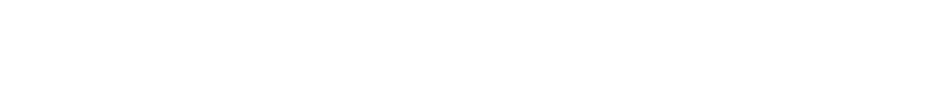

In [33]:
impresso.search.facet("daterange", term="monty python")

### Pagination

In [34]:
result = impresso.search.facet(
    "daterange",
    term="monty python",
    limit=5,
)

print(f"Total items in the result set: {result.total}")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['value']}"
    )

Total items in the result set: 286
Got page 0 - 5 of 286. The first title is 1732-12-01T00:00:00Z
Got page 5 - 10 of 286. The first title is 1737-12-01T00:00:00Z
Got page 10 - 15 of 286. The first title is 1742-12-01T00:00:00Z
Got page 15 - 20 of 286. The first title is 1747-12-01T00:00:00Z
Got page 20 - 25 of 286. The first title is 1752-12-01T00:00:00Z
Got page 25 - 30 of 286. The first title is 1757-12-01T00:00:00Z
Got page 30 - 35 of 286. The first title is 1762-12-01T00:00:00Z
Got page 35 - 40 of 286. The first title is 1767-12-01T00:00:00Z
Got page 40 - 45 of 286. The first title is 1772-12-01T00:00:00Z
Got page 45 - 50 of 286. The first title is 1777-12-01T00:00:00Z
Got page 50 - 55 of 286. The first title is 1782-12-01T00:00:00Z
Got page 55 - 60 of 286. The first title is 1787-12-01T00:00:00Z
Got page 60 - 65 of 286. The first title is 1792-12-01T00:00:00Z
Got page 65 - 70 of 286. The first title is 1797-12-01T00:00:00Z
Got page 70 - 75 of 286. The first title is 1802-12-01T00:

## Year

Get the number of content items that mention "impresso", published during every particular year.

,count
value,
1861,3
1874,1
1894,1

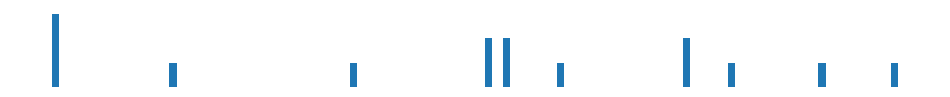

In [35]:
impresso.search.facet("year", term="impresso")

## Content length

Get the number of content items that mention "impresso", grouped by content length.

,count
value,
0,7
100,7
200,11

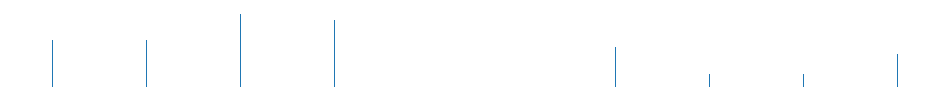

In [36]:
impresso.search.facet("contentLength", term="impresso")

## Month

Get the number of content items that mention "impresso", published during every particular month.

,count
value,
1,5
2,3
3,7

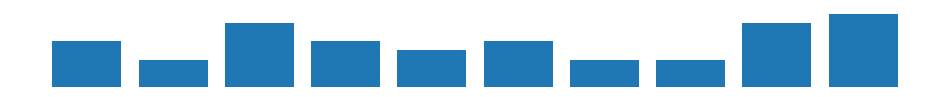

In [37]:
impresso.search.facet("month", term="impresso")

## Country

Get the number of content items that mention "impresso", grouped by country they were published in.

,count
value,
CH,76
FR,2
LU,2

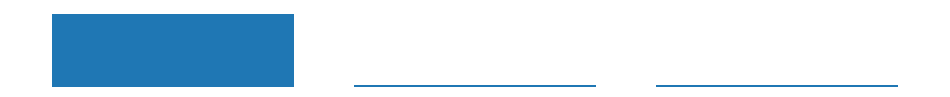

In [38]:
impresso.search.facet("country", term="impresso")

## Type

Get the number of items that mention "impresso", grouped by type of item.

,count
value,
ad,17813044
ar,32853043
chapter,1

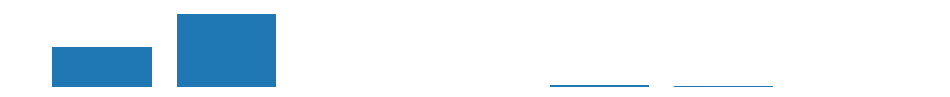

In [39]:
impresso.search.facet("type")

## Topic

Find topics that the content items mentioning "impresso" are related to.

,count,label
value,,
tm-de-all-v2.0_tp00_de,60,NaN
tm-de-all-v2.0_tp01_de,83,"new (0.03594), york (0.02121), spanien (0.0209..."
tm-de-all-v2.0_tp02_de,433,"zimmer (0.02682), wort (0.02321), expedition (..."

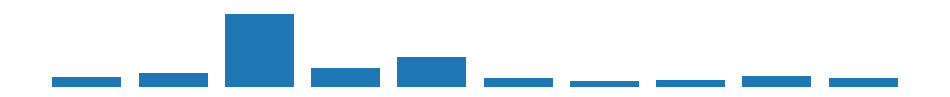

In [43]:
impresso.search.facet("topic", term="pomme")

## Collection

Find collections the content items mentioning "pomme" are part of.

In [49]:
impresso.search.facet("collection", term="pomme")

""


## Newspaper

Find newspapers that the content items mentioning "Schengen" were published in.

,count,label
value,,
DTT,18,Die Tat
EXP,1426,L'Express
FZG,608,Freiburger Nachrichten

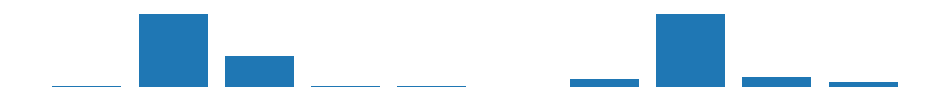

In [50]:
impresso.search.facet("newspaper", term="Schengen")

## Language

Find all languages the content items mentioning "impresso" were published in.

,count
value,
de,6725
fr,6652
it,1

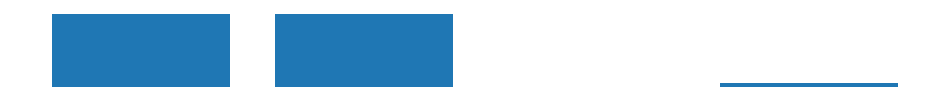

In [51]:
impresso.search.facet("language", term="Schengen")

## Person

Find all persons mentioned in content items that mention "Schengen". Get only the last page.

In [52]:
impresso.search.facet("person", term="Schengen", offset=7140)

""


## Location

Find all locations mentioned in content items that mention "Schengen". Get only the last page.

,count,label
value,,
2-54-Sévaz,1,Sévaz
2-54-Séville,2,Séville
2-54-Südafrikanische_Union,9,Südafrikanische Union

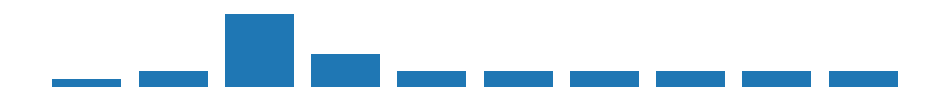

In [54]:
impresso.search.facet("location", term="Schengen", offset=3310)

## NAG

Find all entities without a known type mentioned in content items that mention "homme" and "femme".

,count,label
value,,
4-55-AFP,5,AFP
4-55-AP,8,AP
4-55-ATS_SDA,20,ATS SDA

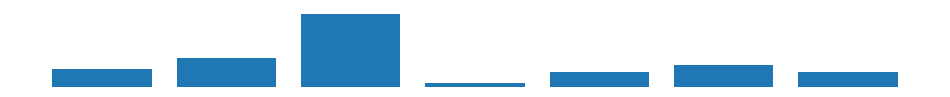

In [55]:
from impresso import AND
impresso.search.facet("nag", title=AND("homme", "femme"))

## Access rights

Get access rights of content items mentioning "pomme".

,count
value,
in_cpy,70118
pbl,11010

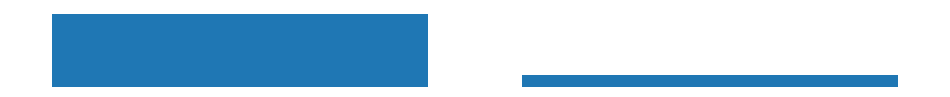

In [58]:
impresso.search.facet("copyright", term="pomme")

## Partner

Get Impresso partners that provided content items mentioning "pomme".

,count
value,
BCUL,1450
BNF,25661
BNL,3593

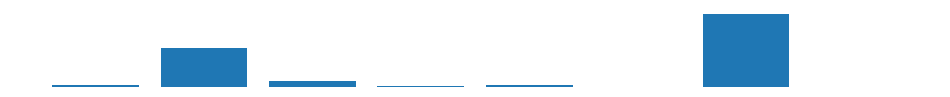

In [59]:
impresso.search.facet("partner", term="pomme")